In [1]:
from robingrad import Tensor, draw_dot
import robingrad.nn as nn
import torch
from sklearn.datasets import make_regression
import numpy as np
import time
from sklearn.metrics import r2_score

### Dataset

In [2]:
X, y = make_regression(n_samples=200, n_features=5, n_targets=1, random_state=42)
print(X.shape)
print(y.shape)
print(X[0])
print(y[0:5])

(200, 5)
(200,)
[0.95927083 0.02451017 0.49799829 1.45114361 2.15318246]
[172.54436082 -52.9529574   -4.14935233 193.99958991 -66.96262773]


In [3]:
X_train = Tensor(X, requires_grad=True)
print(type(X_train), X_train.shape)
y_train = Tensor(y, requires_grad=True)
print(type(y_train), y_train.shape)

<class 'robingrad.tensor.Tensor'> (200, 5)
<class 'robingrad.tensor.Tensor'> (200,)


### Model

In [4]:
class TinyNet:
    def __init__(self):
        self.l1 = nn.Linear(5,16)
        self.l2 = nn.Linear(16,1)
    def __call__(self, x):
        x = self.l1(x)
        x = x.relu()
        x = self.l2(x)
        return x
        
net = TinyNet()

In [5]:
res = net(X_train[0].reshape((1,5)))
res

Tensor: __add__
data: 
[[-6.8599215]]
grad: 
[[0.]]
dtype: float32

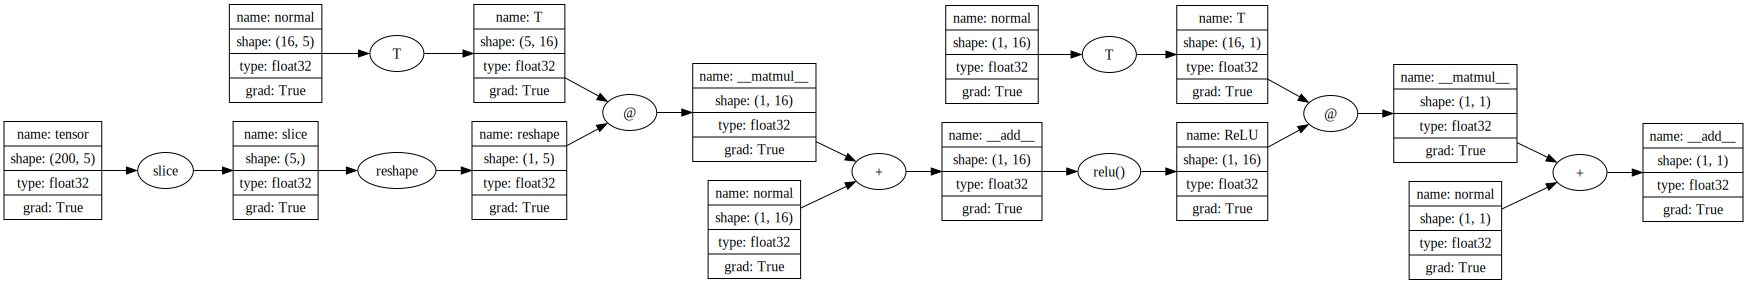

In [6]:
draw_dot(res)

In [7]:
epochs = 100
for epoch in range(epochs):
    y_pred = []
    losses = []
    s = time.monotonic()
    for i in range(X_train.shape[0]):
        output = net(X_train[i].reshape((1,5)))
        y_pred.append(float(output.data[0]))
        target = y_train[i].reshape((1,1))
        loss = (output-target)**2
        losses.append(loss.data)
        loss.backward()
        for p in [net.l1.weight, net.l1.bias, net.l2.weight, net.l2.bias]:
            p.data += -3e-4*p.grad
        for p in [net.l1.weight, net.l1.bias, net.l2.weight, net.l2.bias]:
            p.grad = np.zeros_like(p.grad)
    e = time.monotonic()
    t = e - s
    loss_epoch = sum(losses)/ len(losses)
    r2 = r2_score(y, y_pred)
    if epoch % 10 == 0 or epoch == epochs-1:
        print(f"epoch: {epoch}, time: {t:.2f} sec., r2: {r2}")
        

epoch: 0, time: 0.13 sec., r2: 0.7901373926833324
epoch: 10, time: 0.11 sec., r2: 0.9988361745702523
epoch: 20, time: 0.10 sec., r2: 0.9995699818657485
epoch: 30, time: 0.10 sec., r2: 0.9997804445304629
epoch: 40, time: 0.10 sec., r2: 0.9998765451851573
epoch: 50, time: 0.10 sec., r2: 0.9999280417782764
epoch: 60, time: 0.10 sec., r2: 0.999952715532088
epoch: 70, time: 0.10 sec., r2: 0.9999654303894125
epoch: 80, time: 0.10 sec., r2: 0.9999728646181824
epoch: 90, time: 0.10 sec., r2: 0.9999783443119354
epoch: 99, time: 0.11 sec., r2: 0.9999818618692827


In [8]:
import matplotlib.pyplot as plt

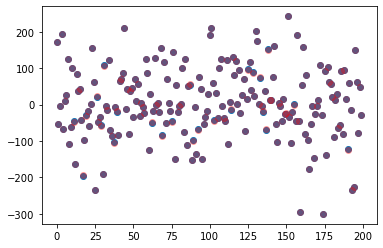

In [9]:
x = [i for i in range(len(X))]
plt.scatter(x, y)
plt.scatter(x, y_pred, color='red', alpha=0.3)
plt.show()